In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

### set random_seed

In [2]:
SEED = 0

### definition of data and errors

- data 

    - data is generated from a joint distribution $p(\mathbf{x}, y)$

    $$
    (\mathbf{x}, y) \sim p(\mathbf{x}, y)
    $$

    - whole data set

    $$
    D_{rs} = \{(\mathbf{x}_{i}, y_{i})|i = 1, \cdots, N = N_{r} + N_{s}\}
    $$

    - train data

    $$
    D_{r} = \{(\mathbf{x}_{i}, y_{i})|i = 1, \cdots, N_{r}\}
    $$

    - test data

    $$
    D_{s} = \{(\mathbf{x}_{i}, y_{i})|i = N_{r} + 1, \cdots, N_{r} + N_{s}\}
    $$

- fit model using the train data D_{r}

$$
\hat{y}_{D_{r}}
$$

- train error

$$
\begin{align}
E_{train} & = & \mathbb{E}_{D_{r}}[E(\hat{y}_{D_{r}}(\mathbf{x}), y)]\\
& = & \frac{1}{N_{r}}\sum^{N_{r}}_{i=1} E(\hat{y}_{D_{r}}(\mathbf{x}_{i}), y_{i})
\end{align}
$$

- test error

$$
\begin{align}
E_{test} & = & \mathbb{E}_{D_{s}}[E(\hat{y}_{D_{r}}(\mathbf{x}), y)]\\
& = & \frac{1}{N_{s}}\sum^{N_{r}+N_{s}}_{i=N_{r}+1} E(\hat{y}_{D_{r}}(\mathbf{x}_{i}), y_{i})
\end{align}
$$

- Expected generalization error

$$
\begin{align}
(\mathbf{x}_{\star}, y_{\star}) & \sim & p(\mathbf{x}, y)\\
E_{new} & = & \mathbb{E}_{\star}[E(\hat{y}_{D_{r}}(\mathbf{x}_{\star}), y_{\star})]
\end{align}
$$



### cross validation

- k-fold cross-validation

    - At the $l$th fold
    
        - train data : $D^{(l)}_{r}$
        - validation data : $D^{(l)}_{v} = D_{r} - D^{(l)}_{r}$

    - $l$th fold train error
    
    $$
    E^{(l)}_{train} = \mathbb{E}_{D^{(l)}_{r}}[E(\hat{y}_{D^{(l)}_{r}}(\mathbf{x}), y)]
    $$

    - $l$th fold validation error

    $$
    E^{(l)}_{val} = \mathbb{E}_{D^{(l)}_{v}}[E(\hat{y}_{D^{(l)}_{r}}(\mathbf{x}), y)]
    $$

- average fitted model

$$
\hat{f}_{D_{r}}(\mathbf{x}) 
= \mathbb{E}_{l}
    \big[
        \hat{y}_{D^{(l)}_{r}}(\mathbf{x})
    \big]
= \frac{1}{k}\sum_{l=1}^{k} \hat{y}_{D^{(l)}_{r}}(\mathbf{x})
$$


### bias-variance decomposition

- bias-variance decomposition of error using $(\mathbf{x}, y) \in D^{(l)}_{v}$
    - noise
$$
\begin{eqnarray}
\mathbb{E}_{l}\Big[
    \mathbb{E}_{(\mathbf{x}, y) \in D^{(l)}_{v}}\Big[
        \big(
            \hat{y}_{D^{(l)}_{r}}(\mathbf{x}) - y
        \big)^{2}
    \Big]
\Big]
& = &
\mathbb{E}_{l}\Big[
    \mathbb{E}_{(\mathbf{x}, y) \in D^{(l)}_{v}}\Big[
        \big(
            \hat{y}_{D^{(l)}_{r}}(\mathbf{x})
          - \hat{f}_{D_{r}}(\mathbf{x})
          + \hat{f}_{D_{r}}(\mathbf{x})
          - y
        \big)^{2}
    \Big]
\Big]\\
& = &
\mathbb{E}_{l}\Big[
    \mathbb{E}_{(\mathbf{x}, y) \in D^{(l)}_{v}}\Big[
        \big(
            \hat{y}_{D^{(l)}_{r}}(\mathbf{x})
          - \hat{f}_{D_{r}}(\mathbf{x})
        \big)^{2}
     \Big]
\Big]\\
&&
\qquad + 2
\mathbb{E}_{l}\Big[
    \mathbb{E}_{(\mathbf{x}, y) \in D^{(l)}_{v}}\Big[
        \big(
            \hat{y}_{D^{(l)}_{r}}(\mathbf{x})
          - \hat{f}_{D_{r}}(\mathbf{x})
        \big)
        \big(
            \hat{f}_{D_{r}}(\mathbf{x})
          - y
        \big)
     \Big]
\Big]\\
&&
\qquad +
\mathbb{E}_{l}\Big[
    \mathbb{E}_{(\mathbf{x}, y) \in D^{(l)}_{v}}\Big[
        \big(
            \hat{f}_{D_{r}}(\mathbf{x})
          - y
        \big)^{2}
     \Big]
\Big]
\end{eqnarray}
$$

    - variance
$$
\mathbb{E}_{l}\Big[
    \mathbb{E}_{(\mathbf{x}, y) \in D^{(l)}_{v}}\Big[
        \big(
            \hat{y}_{D^{(l)}_{r}}(\mathbf{x})
          - \hat{f}_{D_{r}}(\mathbf{x})
        \big)^{2}
     \Big]
\Big]
$$
    - cross noise
$$
2\mathbb{E}_{l}\Big[
    \mathbb{E}_{(\mathbf{x}, y) \in D^{(l)}_{v}}\Big[
        \big(
            \hat{y}_{D^{(l)}_{r}}(\mathbf{x})
          - \hat{f}_{D_{r}}(\mathbf{x})
        \big)
        \big(
            \hat{f}_{D_{r}}(\mathbf{x})
          - y
        \big)
     \Big]
\Big]
$$
    - bias (+ irreducible noise)
$$
\mathbb{E}_{l}\Big[
    \mathbb{E}_{(\mathbf{x}, y) \in D^{(l)}_{v}}\Big[
        \big(
            \hat{f}_{D_{r}}(\mathbf{x})
          - y
        \big)^{2}
     \Big]
\Big]
$$
    
    - The cross noise does not vanish
        - due to the correlation with average model, which is made of validation data

$$
\\
\\
$$

- bias-variance decomposition of error using $(\mathbf{x}, y) \in D_{s}$

$$
\begin{eqnarray}
\mathbb{E}_{l}\Big[
    \mathbb{E}_{(\mathbf{x}, y) \in D_{s}}\Big[
        \big(
            \hat{y}_{D^{(l)}_{r}}(\mathbf{x}) - y
        \big)^{2}
    \Big]
\Big]
& = &
\mathbb{E}_{l}\Big[
    \mathbb{E}_{(\mathbf{x}, y) \in D_{s}}\Big[
        \big(
            \hat{y}_{D^{(l)}_{r}}(\mathbf{x})
          - \hat{f}_{D_{r}}(\mathbf{x})
        \big)^{2}
    \Big]
\Big]\\
&&
\qquad +
\mathbb{E}_{(\mathbf{x}, y) \in D_{s}}\Big[
    \big(
        \hat{f}_{D_{r}}(\mathbf{x})
      - y
    \big)^{2}
\Big]
\end{eqnarray}
$$

    - variance

$$
\mathbb{E}_{l}\Big[
    \mathbb{E}_{(\mathbf{x}, y) \in D_{s}}\Big[
        \big(
            \hat{y}_{D^{(l)}_{r}}(\mathbf{x})
          - \hat{f}_{D_{r}}(\mathbf{x})
        \big)^{2}
    \Big]
\Big]
$$

    - bias (+ irreducible noise)

$$
\mathbb{E}_{(\mathbf{x}, y) \in D_{s}}\Big[
    \big(
        \hat{f}_{D_{r}}(\mathbf{x})
      - y
    \big)^{2}
\Big]
$$

   - The cross noise does vanish
    

### things to be concerned
- maybe the irreducible noise is not uniform over x.
    - true model
$$
y = f_{0}(\mathbf{x}) + \epsilon(\mathbf{x})
$$

- maybe the irreducible noise is uniform but not normal
    - true model
$$
\epsilon \quad not \sim Normal(0, \sigma^{2})
$$
    - if one wants to estimate bias and variance at a specific point among test data 

### generate dataset

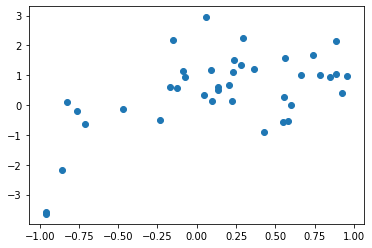

In [13]:
from sklearn.preprocessing import PolynomialFeatures

def generate_dataset(n, ws, order, seed=SEED):
    np.random.seed(seed)
    xs = np.random.uniform(low=-1, high=1, size=n)
    xs = xs[:, np.newaxis]
    xx = PolynomialFeatures(degree=order).fit_transform(xs)
    y = np.dot(xx, ws)
    err = np.random.normal(loc=0.0, scale=1.0, size=n)
    ys = y + err
    return xs, ws, ys, err

order = 6
ws = np.array([1.0, 0.2, -0.3, 0.9, -0.5, 0.9, -0.7])
n = int((2**5) * 1.25)
X, w, y, err = generate_dataset(n, ws, order)
plt.scatter(X, y, marker="o");

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

def compute_noises_with_cv(estimator, X_train, y_train, X_test, y_test, cv, seed):
    y_preds_train, y_preds_test, trains, vals = [], [], [], []
    kfold = KFold(n_splits=cv, random_state=seed).split(X_train, y_train)
    for k, (train, val) in enumerate(kfold):
        model = copy.deepcopy(estimator)
        model.fit(X_train[train], y_train[train])

        y_preds_train.append(model.predict(X_train))
        y_preds_test.append(model.predict(X_test))

        trains.append(train)
        vals.append(val)

    y_pred_train_mean = np.array(y_preds_train).mean(axis=0)
    y_pred_test_mean = np.array(y_preds_test).mean(axis=0)

    return [compute_noises(y_pred_train[train],
                           y_pred_train_mean[train],
                           y_train[train])\
          + compute_noises(y_pred_train[val],
                           y_pred_train_mean[val],
                           y_train[val])\
          + compute_noises(y_pred_test,
                           y_pred_test_mean,
                           y_test)
          for y_pred_train, y_pred_test, train, val
              in zip(y_preds_train, y_preds_test, trains, vals)]

def compute_noises(y_pred, y_pred_mean, y_true):
    return [compute_variance(y_pred, y_pred_mean),
            compute_cross_noise(y_pred, y_pred_mean, y_true),
            compute_bias(y_pred_mean, y_true),
            compute_total_noise(y_pred, y_true)]

def compute_variance(y_pred, y_pred_mean):
    return compute_ms(y_pred - y_pred_mean)

def compute_bias(y_pred_mean, y_true):
    return compute_ms(y_pred_mean - y_true)

def compute_cross_noise(y_pred, y_pred_mean, y_true):
    return 2 * ((y_pred - y_pred_mean) * (y_pred_mean - y_true)).mean()

def compute_total_noise(y_pred, y_true):
    return compute_ms(y_pred - y_true)

def compute_ms(x):
    return (x**2).mean()

def marginalize_out_folds(df_res, hp):
    if type(hp)==str: hp = [hp]
    df_res = df_res.groupby(hp).mean().reset_index()
    df_res.drop(columns="fold", axis=1, inplace=True)
    return df_res

In [15]:
from sklearn.linear_model import Ridge

def main(X, y, cv, alphas):
    data = []
    for alpha in alphas:
        estimator = Ridge(alpha=alpha, fit_intercept=True, normalize=False)
        X_train, X_test, y_train, y_test =\
            train_test_split(X, y, test_size=0.20, random_state=SEED)
        errors = compute_noises_with_cv(estimator, X_train, y_train, X_test, y_test, cv, SEED)
        data.extend([[alpha, k] + errs for k, errs in enumerate(errors)])

    return pd.DataFrame(data, columns=["alpha", "fold", 
                        "variance_train", "cross_train", "bias_train", "error_train",
                        "variance_val", "cross_val","bias_val", "error_val",
                        "variance_test", "cross_test", "bias_test", "error_test"])

### polynominal features in x

In [16]:
cv = 16
alphas = np.power(10.0, np.arange(-6, 3, 1))
df_ress = None
for D in range(1, 30):
    xx = PolynomialFeatures(degree=D).fit_transform(X)[:, 1:]
    df_res = main(xx, y, cv, alphas)
    df_res = marginalize_out_folds(df_res, hp="alpha")
    df_res["order"] = D
    if df_ress is None:
        df_ress = df_res.copy()
    else:
        df_ress = pd.concat([df_ress, df_res], axis=0)
    del df_res

cols = ['order', 'alpha', 'variance_test', 'bias_test', 'error_test']
df = df_ress[cols].copy()

### compare the minimum error case for each alpha with the true model case

In [17]:
tmp1 = df.groupby("alpha")["error_test"].min().reset_index()
tmp1 = tmp1.merge(df, on=["alpha", "error_test"], how="left")
display(tmp1[cols])
display(df[df["order"] == order])

,order,alpha,variance_test,bias_test,error_test
0,6,0.000001,0.021761,1.331676,1.353436
1,6,0.000010,0.021672,1.332617,1.354289
2,6,0.000100,0.020889,1.341917,1.362806
3,6,0.001000,0.017352,1.417658,1.435010
4,10,0.010000,0.021826,1.482008,1.503834
5,16,0.100000,0.021325,1.572360,1.593686
6,29,1.000000,0.009361,1.614967,1.624328
7,29,10.000000,0.004283,1.595000,1.599282
8,29,100.000000,0.004798,1.616051,1.620849


,order,alpha,variance_test,bias_test,error_test
0,6,0.000001,0.021761,1.331676,1.353436
1,6,0.000010,0.021672,1.332617,1.354289
2,6,0.000100,0.020889,1.341917,1.362806
3,6,0.001000,0.017352,1.417658,1.435010
4,6,0.010000,0.011433,1.589039,1.600471
5,6,0.100000,0.006575,1.663881,1.670456
6,6,1.000000,0.005517,1.756530,1.762047
7,6,10.000000,0.006464,1.720009,1.726473
8,6,100.000000,0.005439,1.658827,1.664266


### plot bias, variance and error for each [alpha, order]

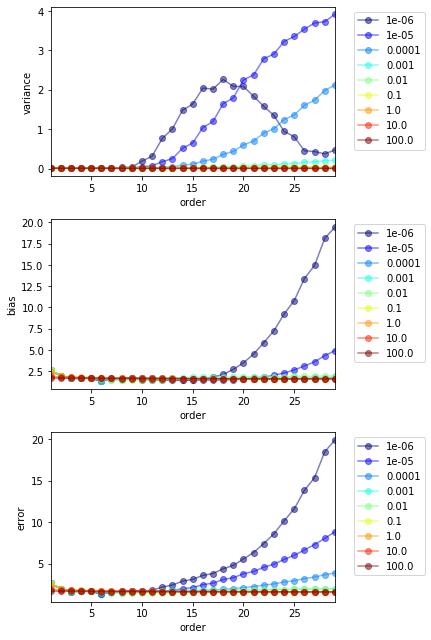

In [18]:
alphas = df["alpha"].unique()
alphas.sort()
colors = plt.get_cmap("jet", len(alphas))
fig, axs = plt.subplots(3, 1, figsize=(6, 9))
for i, alpha in enumerate(alphas):
    cr = colors(i)[:-1]
    df[df["alpha"] == alpha].plot(x="order", y="variance_test", ax=axs[0], color=cr, alpha=0.5, marker="o")
    df[df["alpha"] == alpha].plot(x="order", y="bias_test", ax=axs[1], color=cr, alpha=0.5, marker="o")
    df[df["alpha"] == alpha].plot(x="order", y="error_test", ax=axs[2], color=cr, alpha=0.5, marker="o")

axs[0].legend(alphas, bbox_to_anchor=(1.05, 1), loc='upper left')
axs[0].set_ylabel("variance")
axs[1].legend(alphas, bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].set_ylabel("bias")
axs[2].legend(alphas, bbox_to_anchor=(1.05, 1), loc='upper left')
axs[2].set_ylabel("error")
plt.tight_layout()

### the best case (model with the minimum test error)

In [19]:
error_min = df["error_test"].min()
odr = df.loc[df["error_test"] == error_min, "order"].values[0]
alp = df.loc[df["error_test"] == error_min, "alpha"].values[0]
display(df[df["error_test"] == error_min])

,order,alpha,variance_test,bias_test,error_test
0,6,0.000001,0.021761,1.331676,1.353436
